# Etivity 2: Data Preparation (Carla Warde - 17204542)
After my <b>Exploratory Data Analysis</b> I am now ready to perform <b>Data Preparation</b> to resolve the issues in the dataset I found previously in Etivity 1.

Some of these issues were missing values in attributes such as `poutcome`, and also outliers in the `age` attribute. By performing Data Preparation I can treat these issues by using the following steps:
<ol>
    <li>Import data and relevant modules</li>
    <li>Encode all categorical attributes as numerical.</li>
    <li>Fill in all missing values in the dataset.</li>
    <li>Apply scalars to the dataset.</li>
    <li>Treat outliers.</li>
    <li>Create new features, derived from existing ones.</li>
    <li>Save dataset for future use</li>
</ol>

## 1. Import Modules and Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

#read in data using pandas
df = pd.read_csv("./bank.csv")
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,secondary,no,127,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,primary,no,1154,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,46.0,services,married,primary,no,4343,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,secondary,no,6403,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


First step is to check for missing values.

In [2]:
df.isna().sum()

age            12
job            10
marital         0
education     104
default         0
balance         0
housing         0
loan            0
contact       191
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      454
subscribed      0
dtype: int64

As we can see here, there are missing values in the following Numerical attributes:
    <ul>
        <li>`age`</li>
    </ul>
And these Categorical attributes:
    <ul>
        <li>`job`</li>
        <li>`education`</li>
        <li>`contact`</li>
        <li>`poutcome`</li>
    

In [3]:
#copy dataset before making any changes
df_original = df

## 2. Process and Encode the Categorical Features
Upon a first glance, the dataframe does not have any irrelevant fields such as `ID` that we need to drop. As such, we can begin processing and encoding categorical attributes into numerical attributes.

### 2.1 Encoding Ordinal Attributes

The first attribute I will encode is `month` since it is the only <i>ordinal</i> attribute since the months follow an order. The months can be mapped from values 0-11, and then, since it can also be considered <i>cyclical</i> (i.e December leads into January), I will use the sin and cos rule on these values to better represent the cyclical nature of this attribute.

In [4]:
month_mapper = {"jan": 0,
             "feb": 1,
             "mar": 2,
             "apr": 3,
             "may": 4,
             "jun": 5,
             "jul": 6,
             "aug": 7,
             "sep": 8,
             "oct": 9,
             "nov": 10,
             "dec": 11}
df['month'] = df['month'].replace(month_mapper)
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,8,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,secondary,no,127,no,no,cellular,16,8,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,primary,no,1154,no,no,telephone,17,8,231,1,-1,0,NaN,yes
1998,46.0,services,married,primary,no,4343,yes,no,NaN,20,8,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,secondary,no,6403,no,no,cellular,22,8,208,2,-1,0,NaN,yes


As you can see above, the values in `month` have been mapped to numbers. We can now apply the cos and sin rule to these values.

In [5]:
#Sin and cosine rule on month attribute
df['sin_month'] = np.sin(2 * np.pi * df['month']/max(df['month']))
df['cos_month'] = np.cos(2 * np.pi * df['month']/max(df['month']))

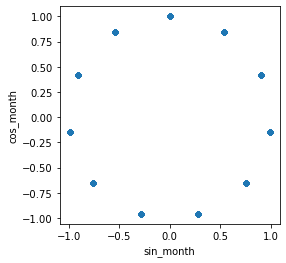

In [6]:
df.plot.scatter('sin_month', 'cos_month').set_aspect('equal')

The above scatter graph of the `sin_month` and `cos_month` shows the cyclic nature of the month attribute. 

The `day` attribute is also cyclical since it follows a cycle of dates. This cycle is not as uniform as months due to months having a different number of days but it is still a cycle regardless. Thus the same sin and cos rules can be applied to this attribute.

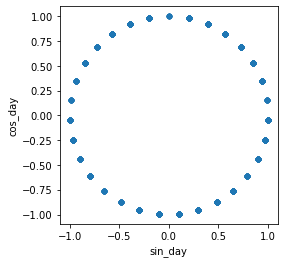

In [7]:
df['sin_day'] = np.sin(2 * np.pi * df['day']/max(df['day']))
df['cos_day'] = np.cos(2 * np.pi * df['day']/max(df['day']))
df.plot.scatter('sin_day', 'cos_day').set_aspect('equal')

Again, this graph shows the cyclic nature of the `day` attribute. Since we now have the sin and cosine values for `day` and `month`, we can now drop the original columns.

In [8]:
df.drop(columns=['month', 'day'])

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,subscribed,sin_month,cos_month,sin_day,cos_day
0,32.0,technician,single,tertiary,no,392,yes,no,cellular,957,2,131,2,failure,no,0.989821,-0.142315,0.201299,0.979530
1,39.0,technician,divorced,secondary,no,688,yes,yes,cellular,233,2,133,1,failure,no,0.989821,-0.142315,0.201299,0.979530
2,59.0,retired,married,secondary,no,1035,yes,yes,cellular,126,2,239,1,failure,no,0.989821,-0.142315,0.201299,0.979530
3,47.0,blue-collar,married,secondary,no,398,yes,yes,cellular,274,1,238,2,failure,no,0.989821,-0.142315,0.201299,0.979530
4,54.0,retired,married,secondary,no,1004,yes,no,cellular,479,1,307,1,failure,no,0.989821,-0.142315,0.201299,0.979530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,20.0,student,single,NaN,no,2785,no,no,cellular,327,2,-1,0,NaN,yes,-0.989821,-0.142315,-0.101168,-0.994869
1996,28.0,admin.,single,secondary,no,127,no,no,cellular,1334,2,-1,0,NaN,yes,-0.989821,-0.142315,-0.101168,-0.994869
1997,81.0,retired,married,primary,no,1154,no,no,telephone,231,1,-1,0,NaN,yes,-0.989821,-0.142315,-0.299363,-0.954139
1998,46.0,services,married,primary,no,4343,yes,no,NaN,185,1,-1,0,NaN,yes,-0.989821,-0.142315,-0.790776,-0.612106


### 2.2 One-Hot Encoding

To begin, we'll start by one-hot encoding categorical attributes with missing values or NaN. As previously discussed, said attributes are `job`,`education`,`contact` and`poutcome`.

In [9]:
df = pd.get_dummies(df, columns=['job', 'education', 'contact', 'poutcome'], dummy_na=True, drop_first=True)
df.tail()

,age,marital,default,balance,housing,loan,day,month,duration,campaign,...,job_unemployed,job_nan,education_secondary,education_tertiary,education_nan,contact_telephone,contact_nan,poutcome_other,poutcome_success,poutcome_nan
1995,20.0,single,no,2785,no,no,16,8,327,2,...,0,0,0,0,1,0,0,0,0,1
1996,28.0,single,no,127,no,no,16,8,1334,2,...,0,0,1,0,0,0,0,0,0,1
1997,81.0,married,no,1154,no,no,17,8,231,1,...,0,0,0,0,0,1,0,0,0,1
1998,46.0,married,no,4343,yes,no,20,8,185,1,...,0,0,0,0,0,0,1,0,0,1
1999,40.0,married,no,6403,no,no,22,8,208,2,...,0,0,1,0,0,0,0,0,0,1


Now, we can perform one-hot encoding on the remaining categorical attributes.

In [10]:
df = pd.get_dummies(df, drop_first=True)
df.tail()

,age,balance,day,month,duration,campaign,pdays,previous,sin_month,cos_month,...,contact_nan,poutcome_other,poutcome_success,poutcome_nan,marital_married,marital_single,default_yes,housing_yes,loan_yes,subscribed_yes
1995,20.0,2785,16,8,327,2,-1,0,-0.989821,-0.142315,...,0,0,0,1,0,1,0,0,0,1
1996,28.0,127,16,8,1334,2,-1,0,-0.989821,-0.142315,...,0,0,0,1,0,1,0,0,0,1
1997,81.0,1154,17,8,231,1,-1,0,-0.989821,-0.142315,...,0,0,0,1,1,0,0,0,0,1
1998,46.0,4343,20,8,185,1,-1,0,-0.989821,-0.142315,...,1,0,0,1,1,0,0,1,0,1
1999,40.0,6403,22,8,208,2,-1,0,-0.989821,-0.142315,...,0,0,0,1,1,0,0,0,0,1


## 3. Treatment of Missing Values in Numerical Attributes


In [11]:
df.isna().sum()

age                    12
balance                 0
day                     0
month                   0
duration                0
campaign                0
pdays                   0
previous                0
sin_month               0
cos_month               0
sin_day                 0
cos_day                 0
job_blue-collar         0
job_entrepreneur        0
job_housemaid           0
job_management          0
job_retired             0
job_self-employed       0
job_services            0
job_student             0
job_technician          0
job_unemployed          0
job_nan                 0
education_secondary     0
education_tertiary      0
education_nan           0
contact_telephone       0
contact_nan             0
poutcome_other          0
poutcome_success        0
poutcome_nan            0
marital_married         0
marital_single          0
default_yes             0
housing_yes             0
loan_yes                0
subscribed_yes          0
dtype: int64

As we can now see, `age` is now the only attribute left with missing values. There are 12 values missing out of 2000 rows, or 0.6%. This is a very small proportion of the data frame thus we will not drop this column. Instead I will predict the age of the missing entries by using existing data. The mean and median could be used, but due to the presence of outliers in the data this is not wise as it could cause the predictions to be very biased.

I hypothesise that the `martial_single` and `job_retired` attributes will give a good predication for the missing `age` values.

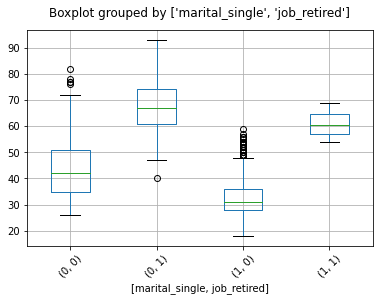

In [12]:
df.boxplot(column='age', by=['marital_single','job_retired'], rot=45)
plt.title("")
plt.show()

As seen in the box plot above, there are varying median values based on these attributes. People who are single tend to be younger, married are older. It's vice versa for being retired. By contrasting both attributes for an indication of age we get more variation in the results.

In [13]:
ptable = df.pivot_table(values='age', 
                        index='job_retired',
                        columns= 'marital_single',   
                        aggfunc=np.median)
ptable

marital_single,0,1
job_retired,,
0,42.0,31.0
1,67.0,60.5


The pivot table above provides the exact numerical values for the medians of the different possibilities of `martial_single` and `job_retired`. We can use these median values as predictions for the missing values.

In [14]:
# Function to retrieve a value from the data
def get_element(x):
    return ptable.loc[x['job_retired'], x['marital_single']]

# Replace missing age values with predictions
df['age'].fillna(df[df['age'].isnull()].apply(get_element, axis=1), inplace=True)

In [15]:
df.isna().sum()

age                    0
balance                0
day                    0
month                  0
duration               0
campaign               0
pdays                  0
previous               0
sin_month              0
cos_month              0
sin_day                0
cos_day                0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_nan                0
education_secondary    0
education_tertiary     0
education_nan          0
contact_telephone      0
contact_nan            0
poutcome_other         0
poutcome_success       0
poutcome_nan           0
marital_married        0
marital_single         0
default_yes            0
housing_yes            0
loan_yes               0
subscribed_yes         0
dtype: int64

As we can now see, there are no longer any missing values in the `age` attribute or any other attribute.

## 4. Rescaling Features
Due to the data preparation we have performed on the categorical and ordinal attributes, we do not have to rescale them. This categorical attribtues are in the range [0,1], and the sin and cos attributes for `day` and `month` are in the range [-1,1].

This leaves `age`, `balance`, `duration`, `campaign`, `previous` and `pdays`.

Before we attempt any rescaling we must check for two things:
<ol>
    <li>Outliers</li>
    <li>Whether the attribute actually needs to be scaled</li>
</ol>
A distribution plot of these attributes will reveal this information and then we can decide on what methods of rescaling to use.

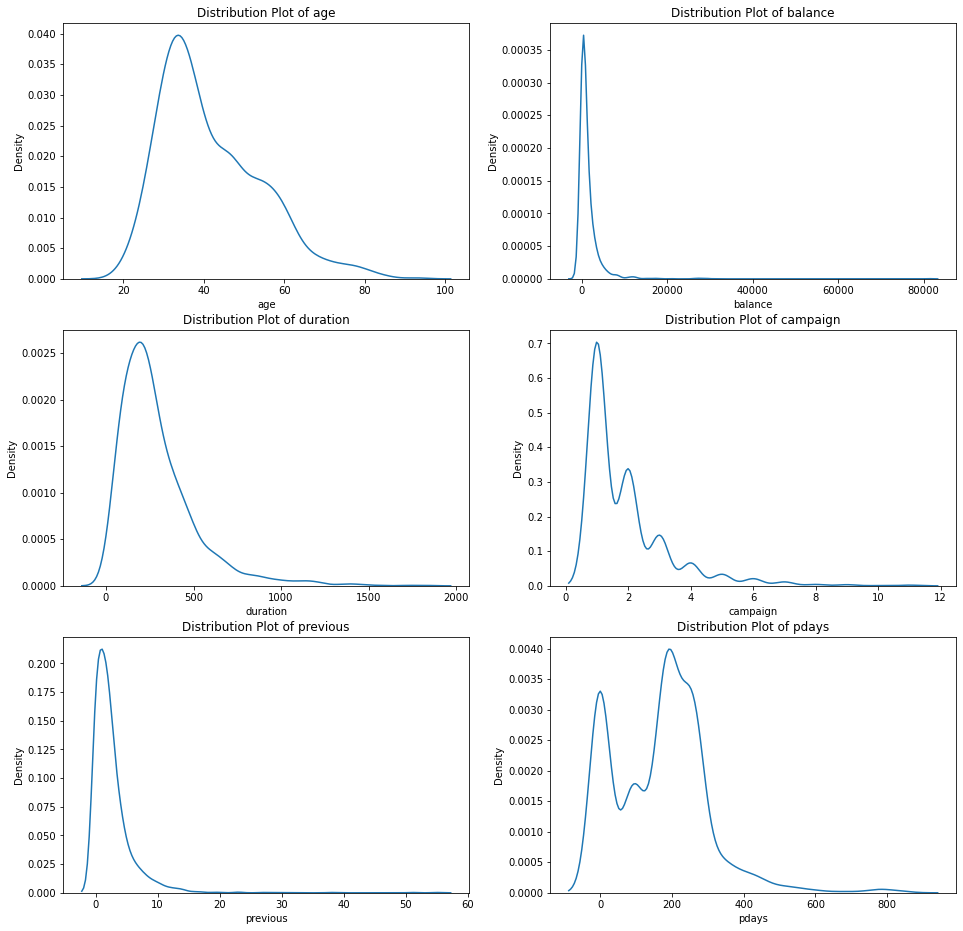

In [16]:
#set up a figure with 3 rows x 2 columns of subplots
fig, axes = plt.subplots(3, 2, figsize=(16, 16))

# plot age
ax1 = sns.kdeplot(df['age'], ax=axes[0, 0])
ax1.set_title("Distribution Plot of age")

#plot balance
ax2 = sns.kdeplot(df['balance'], ax=axes[0, 1])
ax2.set_title("Distribution Plot of balance")

#plot duration
ax3 = sns.kdeplot(df['duration'], ax=axes[1, 0])
ax3.set_title("Distribution Plot of duration")

#plot campaign
ax4 = sns.kdeplot(df['campaign'], ax=axes[1, 1])
ax4.set_title("Distribution Plot of campaign")

#plot previous
ax5 = sns.kdeplot(df['previous'], ax=axes[2, 0])
ax5.set_title("Distribution Plot of previous")

#plot pdays
ax6 = sns.kdeplot(df['pdays'], ax=axes[2, 1])
ax6.set_title("Distribution Plot of pdays")
plt.show()

The above plots show that most of the attributes are right-skewed, particularly `previous` and `balance`.

`age` and `campaign` have the most normal distrbution out the remaining attribtues, thus we will apply the Standard Scalar to these since they can be centered by using the <b>mean</b> and <b>standard deviation</b> (because these values have not been greatly effected by outliers).

In [17]:
# Use a standard scaler to scale attributes
scaler = StandardScaler()
df[['campaign','age',]] = scaler.fit_transform(df[['campaign','age']])

Let's use boxplots to get a better understanding of the remaining four attributes.

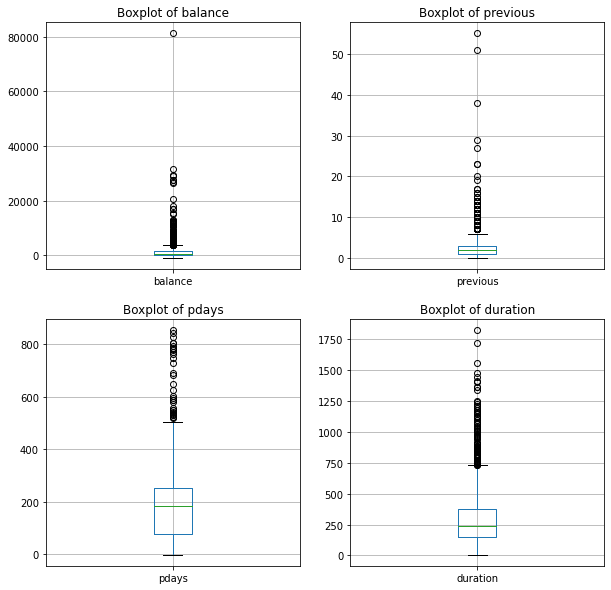

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

#plot balance
ax1 = df.boxplot(column='balance', ax=axes[0,0])
ax1.set_title("Boxplot of balance")

#plot duration
ax2 = df.boxplot(column='duration', ax=axes[1,1])
ax2.set_title("Boxplot of duration")

#plot previous
ax3 = df.boxplot(column='previous', ax=axes[0,1])
ax3.set_title("Boxplot of previous")

#plot pdays
ax4 = df.boxplot(column='pdays', ax=axes[1,0])
ax4.set_title("Boxplot of pdays")

plt.show()

The presence of outliers can be confirmed by the above boxplots. Thus we will use the RobustScaler since that does better in the presence of outliers than other scalars.

In [19]:
# use robust scaler to scale attributes with outliers
robust_scaler = RobustScaler()
df[['balance','previous','pdays', 'duration']] = robust_scaler.fit_transform(df[['balance','previous','pdays', 'duration']])

## 5. Treat Outliers


In the previous section we established the presence of outliers in `balance`, `duration`,`pdays` and `previous`. However, only `balance` and `previous` have extreme outliers due to the bigger range in possible values. Let's take a look at histograms of these attributes,

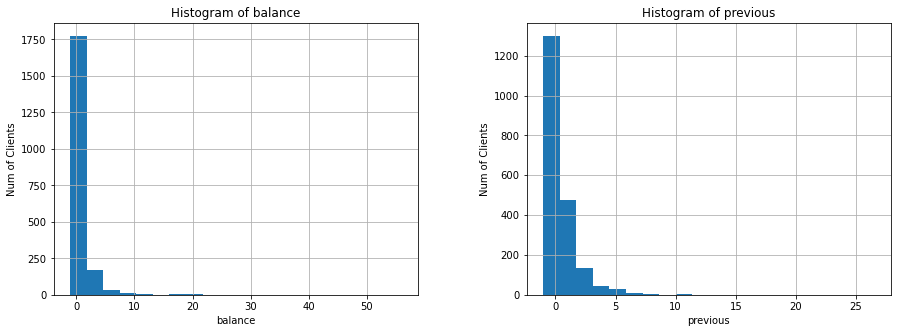

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

#plot balance
ax1 = axes[0]
df.hist(column='balance', ax=axes[0], bins=20)
ax1.set_title("Histogram of balance")
ax1.set_xlabel('balance')
ax1.set_ylabel('Num of Clients')

#plot previous
ax2 = axes[1]
df.hist(column='previous', ax=axes[1], bins=20)
ax2.set_title("Histogram of previous")
ax2.set_xlabel('previous')
ax2.set_ylabel('Num of Clients')

plt.show()

Much like the distribution plots earlier, these histograms reveal how these attributes are right-skewed. Thus we must treat them for outliers since ML algorithms work best when the data is not skewed. This can be done by applying a log function.

First, we must check the minimum values of these attributes.

In [21]:
df[['balance', 'previous']].min()

balance    -1.060984
previous   -1.000000
dtype: float64

Since these attributes contian negative values, we must shift them to the right before applying the log function.

In [22]:
# Use a log transformation to decrease the impact of outliers
df['balance'] = np.log(df['balance']+2.07)
df['previous'] = np.log(df['previous']+2)

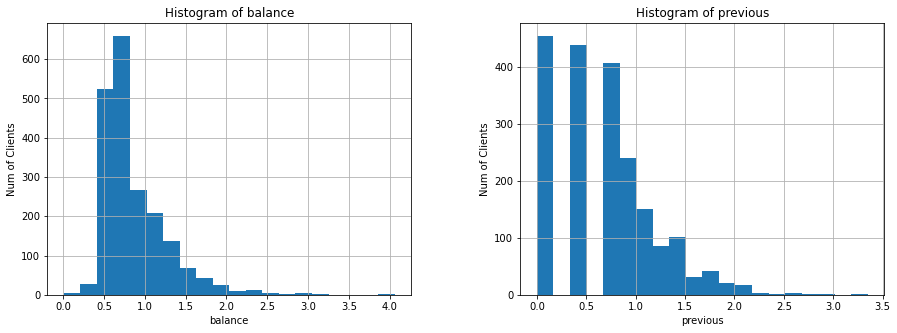

In [23]:
# plot histograms after applying log function
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

#plot balance
ax1 = axes[0]
df.hist(column='balance', ax=axes[0], bins=20)
ax1.set_title("Histogram of balance")
ax1.set_xlabel('balance')
ax1.set_ylabel('Num of Clients')

#plot previous
ax3 = axes[1]
df.hist(column='previous', ax=axes[1], bins=20)
ax3.set_title("Histogram of previous")
ax3.set_xlabel('previous')
ax3.set_ylabel('Num of Clients')

plt.show()

As we can now observe in the histograms above, the distribution of these attributes are less skewed, and thus closer to normal distrbution. It also can be noted that there are no longer any negative values since we shifted them to the right in the previous step.

## 6. Creation of Derived Features
Firstly, I am going to drop the `duration` column since the dataset itself says that "this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model." Thus, since we will be applying ML algorithms to this data in the future, I think it is necessary to remove this feature.

In [24]:
df.drop('duration', axis=1, inplace=True)
df.tail()

,age,balance,day,month,campaign,pdays,previous,sin_month,cos_month,sin_day,...,contact_nan,poutcome_other,poutcome_success,poutcome_nan,marital_married,marital_single,default_yes,housing_yes,loan_yes,subscribed_yes
1995,-1.711584,1.285967,16,8,0.065650,-1.044223,0.0,-0.989821,-0.142315,-0.101168,...,0,0,0,1,0,1,0,0,0,1
1996,-1.081891,0.574458,16,8,0.065650,-1.044223,0.0,-0.989821,-0.142315,-0.101168,...,0,0,0,1,0,1,0,0,0,1
1997,3.089825,0.911431,17,8,-0.659767,-1.044223,0.0,-0.989821,-0.142315,-0.299363,...,0,0,0,1,1,0,0,0,0,1
1998,0.334918,1.547107,20,8,-0.659767,-1.044223,0.0,-0.989821,-0.142315,-0.790776,...,1,0,0,1,1,0,0,1,0,1
1999,-0.137352,1.812451,22,8,0.065650,-1.044223,0.0,-0.989821,-0.142315,-0.968077,...,0,0,0,1,1,0,0,0,0,1


While encoding the categorical attributes, I created `sin_month`, `cos_month`, `sin_day` and `cos_day` features to better represent the cyclical nature of these attributes as can be seen in the below scatter plots:

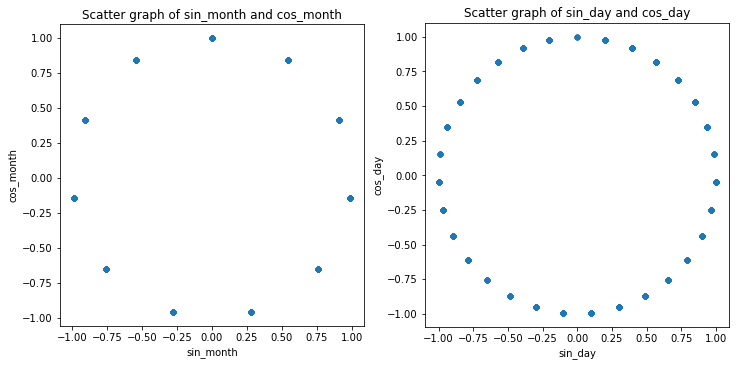

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(12, 12))

#month scatter graph
ax1 = axes[0]
df.plot.scatter('sin_month', 'cos_month', ax=axes[0]).set_aspect('equal')
ax1.set_title("Scatter graph of sin_month and cos_month")
ax1.set_xlabel('sin_month')
ax1.set_ylabel('cos_month')

#day scatter graph
ax2 = axes[1]
df.plot.scatter('sin_day', 'cos_day', ax=axes[1]).set_aspect('equal')
ax2.set_title("Scatter graph of sin_day and cos_day")
ax2.set_xlabel('sin_day')
ax2.set_ylabel('cos_day')

plt.show()

Now to create another derived feature: The `previous` attribute contains a lot of zeros and I believe much of this can be attributed to the fact that many people in the data had not been contacted previously, and as a result this skews the data towards 0. Unfortuntely, this cannot easily be fixed by a log transformation. 

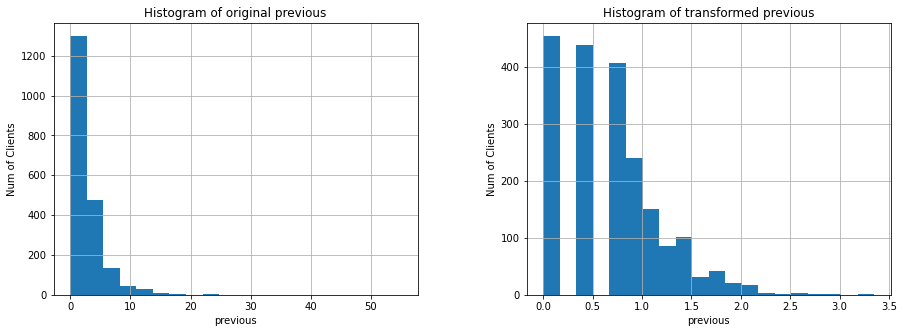

In [25]:
# plot original and transformed previous
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

ax1 = axes[0]
df_original.hist(column='previous', ax=axes[0], bins=20)
ax1.set_title("Histogram of original previous")
ax1.set_xlabel('previous')
ax1.set_ylabel('Num of Clients')

ax2 = axes[1]
df.hist(column='previous', ax=axes[1], bins=20)
ax2.set_title("Histogram of transformed previous")
ax2.set_xlabel('previous')
ax2.set_ylabel('Num of Clients')

plt.show()

As illustrated in the above plots, even the log transformation was unable to treat the skew towards 0 in `previous` properly.

So, to overcome this I propose the `total_contacts` attribute which will be the sum of `campaign` and `previous`. This will allow us to drop the `previous` attribute since it can be calculated from `total_contacts`-`campaign`.

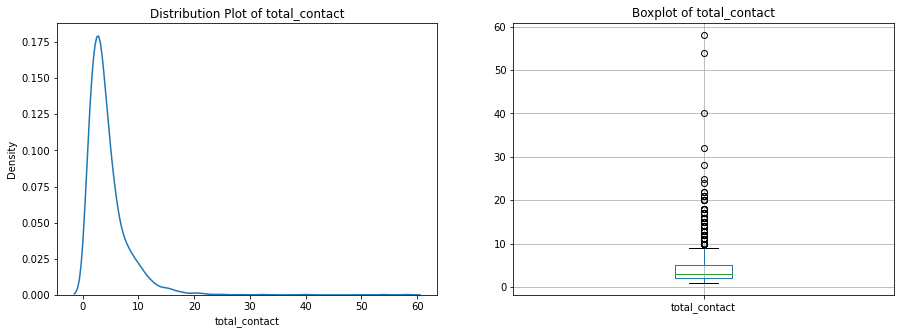

In [26]:
# Create total_contact column and display distribution plot and box plot
df['total_contact'] = df_original['previous'] + df_original['campaign']

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
ax1 = sns.kdeplot(df['total_contact'], ax=axes[0])
ax1.set_title("Distribution Plot of total_contact")

ax2 = df.boxplot(column='total_contact', ax=axes[1])
ax2.set_title("Boxplot of total_contact")

plt.show()

Due to the presence of outliers as seen in the above plots, it's best that we scale our new feature with the robust scaler and then treat it with the log transformation.

In [27]:
#apply robust scalar
df[['total_contact']] = robust_scaler.fit_transform(df[['total_contact']])
#check min value to see if we need to shift it
df[['total_contact']].min()

total_contact   -0.666667
dtype: float64

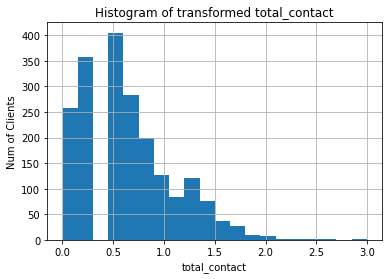

In [28]:
#apply log transformation and shift values right to remove any negative values
df['total_contact'] = np.log(df['total_contact']+1.67)

#plot histogram of transformed total_contact
df.hist(column='total_contact', bins=20)
plt.title("Histogram of transformed total_contact")
plt.xlabel('total_contact')
plt.ylabel('Num of Clients')
 
plt.show()

Now that `total_contact` has been appropriately treated, we can drop the `previous` column.

In [29]:
df.drop('previous', axis=1, inplace=True)
# show current features in dataset
df.tail()

,age,balance,day,month,campaign,pdays,sin_month,cos_month,sin_day,cos_day,...,poutcome_other,poutcome_success,poutcome_nan,marital_married,marital_single,default_yes,housing_yes,loan_yes,subscribed_yes,total_contact
1995,-1.711584,1.285967,16,8,0.065650,-1.044223,-0.989821,-0.142315,-0.101168,-0.994869,...,0,0,1,0,1,0,0,0,1,0.290179
1996,-1.081891,0.574458,16,8,0.065650,-1.044223,-0.989821,-0.142315,-0.101168,-0.994869,...,0,0,1,0,1,0,0,0,1,0.290179
1997,3.089825,0.911431,17,8,-0.659767,-1.044223,-0.989821,-0.142315,-0.299363,-0.954139,...,0,0,1,1,0,0,0,0,1,0.003328
1998,0.334918,1.547107,20,8,-0.659767,-1.044223,-0.989821,-0.142315,-0.790776,-0.612106,...,0,0,1,1,0,0,1,0,1,0.003328
1999,-0.137352,1.812451,22,8,0.065650,-1.044223,-0.989821,-0.142315,-0.968077,-0.250653,...,0,0,1,1,0,0,0,0,1,0.290179


## 7. Save Dataset
The final step is to save the dataset for future use.

In [30]:
df.to_csv('banks_prepared.csv')